In [1]:
pip install --upgrade numpy statsmodels


Requirement already up-to-date: numpy in c:\users\hp\anaconda3\lib\site-packages (1.24.4)
Requirement already up-to-date: statsmodels in c:\users\hp\anaconda3\lib\site-packages (0.14.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade numpy

Requirement already up-to-date: numpy in c:\users\hp\anaconda3\lib\site-packages (1.24.4)


In [3]:
!pip install --upgrade seaborn
!pip install --upgrade matplotlib

Requirement already up-to-date: seaborn in c:\users\hp\anaconda3\lib\site-packages (0.13.2)
Requirement already up-to-date: matplotlib in c:\users\hp\anaconda3\lib\site-packages (3.7.5)


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 


%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [37]:

Default1= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

Default1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [38]:
print('The number of rows (observations) is',Default1.shape[0],'\n''The number of columns (variables) is',Default1.shape[1])

The number of rows (observations) is 1470 
The number of columns (variables) is 35


In [39]:
Default1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [40]:
Default1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [41]:
Default1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [42]:
print("No.Of Duplicate Rows",Default1.duplicated().sum())

No.Of Duplicate Rows 0


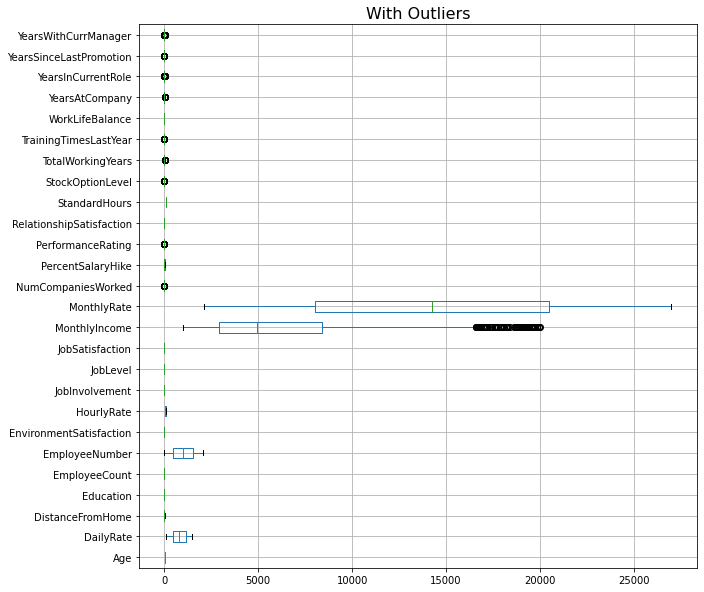

In [43]:

cont = Default1.dtypes[(Default1.dtypes != 'object') & (Default1.dtypes != 'bool')].index

plt.figure(figsize=(10,10))
Default1[cont].boxplot(vert=0)
plt.title('With Outliers', fontsize=16)
plt.show()




In [44]:
def univariateAnalysis(column):
    print("Description of"+column)
    print(Default1[column].describe(),end=' ')
    plt.figure()
    print("Description of"+column)
    sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);
    plt.show()

In [45]:
df2=Default1.select_dtypes(include=['int64'])
lstnumericcolumns=list(df2.columns)
len(lstnumericcolumns)

26

Description ofAge
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64 Description ofAge


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


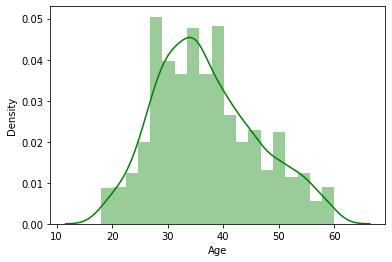

Description ofDailyRate


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64 Description ofDailyRate


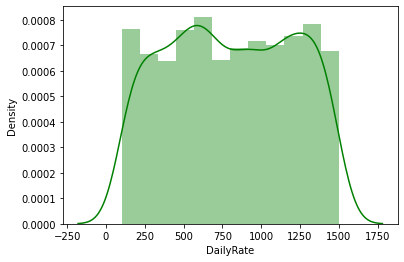

Description ofDistanceFromHome
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64 Description ofDistanceFromHome


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


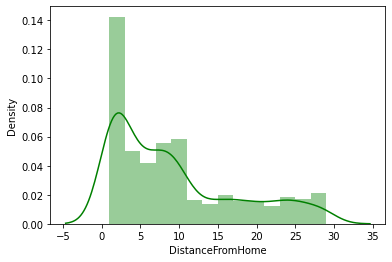

Description ofEducation
count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64 Description ofEducation


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


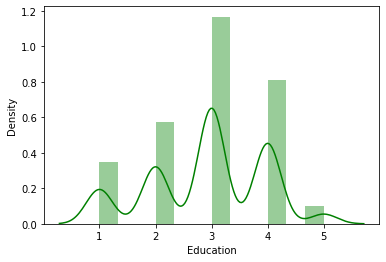

Description ofEmployeeCount
count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64 Description ofEmployeeCount


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


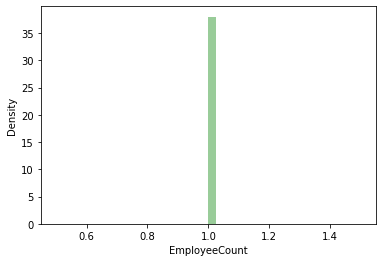

Description ofEmployeeNumber
count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64

<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


 Description ofEmployeeNumber


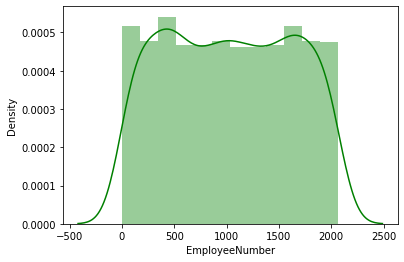

Description ofEnvironmentSatisfaction
count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64 Description ofEnvironmentSatisfaction


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


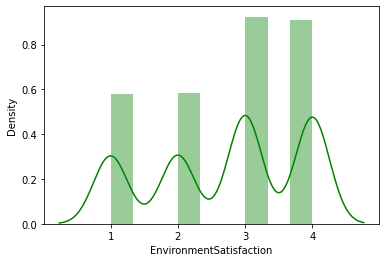

Description ofHourlyRate
count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64 Description ofHourlyRate


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


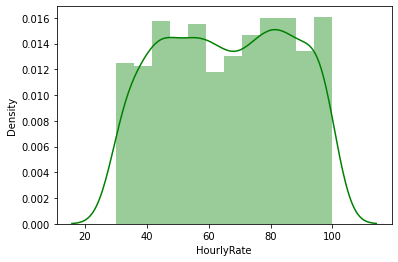

Description ofJobInvolvement
count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64 Description ofJobInvolvement


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


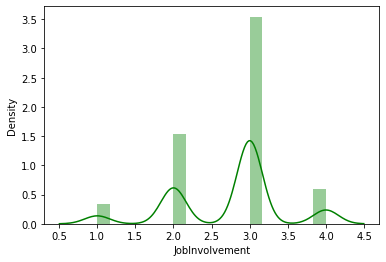

<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


Description ofJobLevel
count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64 Description ofJobLevel


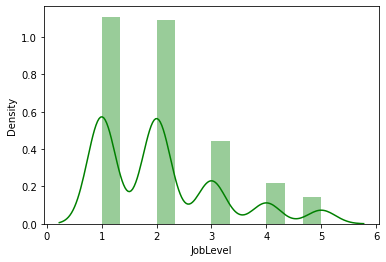

Description ofJobSatisfaction
count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64 Description ofJobSatisfaction


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


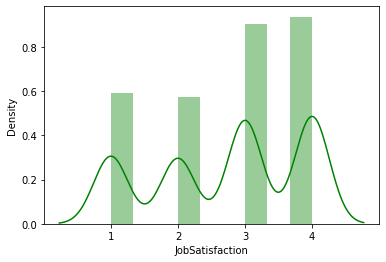

Description ofMonthlyIncome
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64 Description ofMonthlyIncome


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


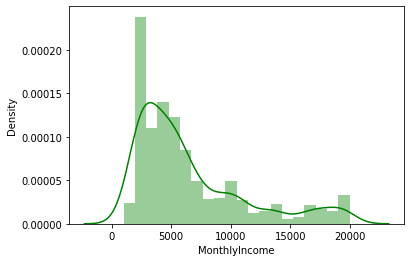

Description ofMonthlyRate
count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64 Description ofMonthlyRate


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


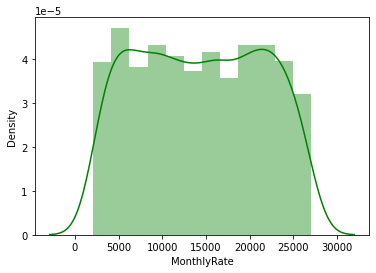

Description ofNumCompaniesWorked
count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64 Description ofNumCompaniesWorked


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


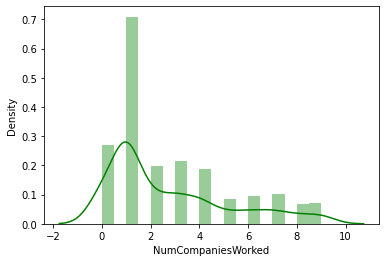

Description ofPercentSalaryHike
count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64 Description ofPercentSalaryHike


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


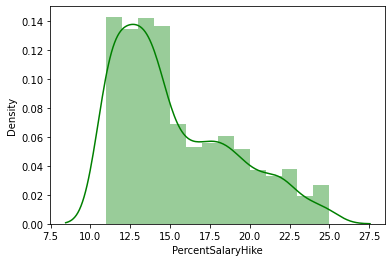

Description ofPerformanceRating
count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64 Description ofPerformanceRating


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


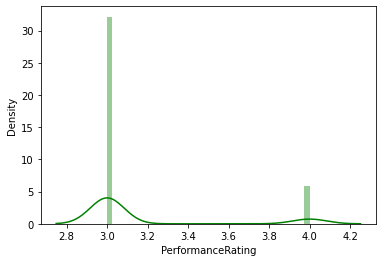

Description ofRelationshipSatisfaction
count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64 Description ofRelationshipSatisfaction


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


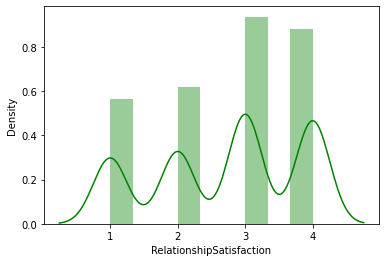

Description ofStandardHours
count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64 Description ofStandardHours


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


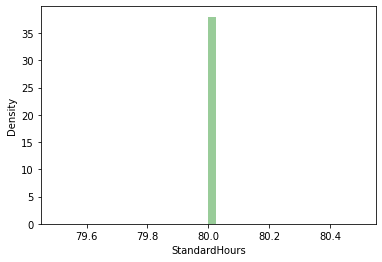

<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


Description ofStockOptionLevel
count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64 Description ofStockOptionLevel


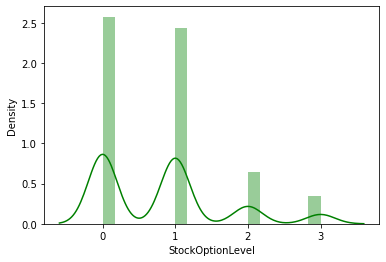

Description ofTotalWorkingYears
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64 Description ofTotalWorkingYears


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


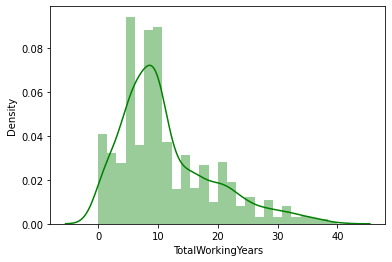

Description ofTrainingTimesLastYear
count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64 Description ofTrainingTimesLastYear


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


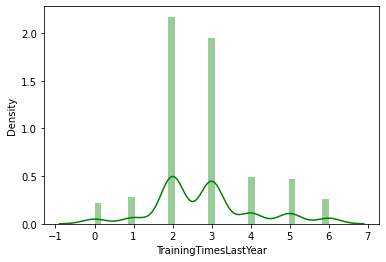

Description ofWorkLifeBalance
count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64 Description ofWorkLifeBalance


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


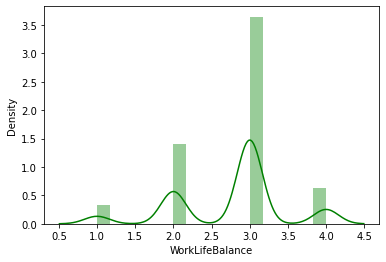

Description ofYearsAtCompany
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64 Description ofYearsAtCompany


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


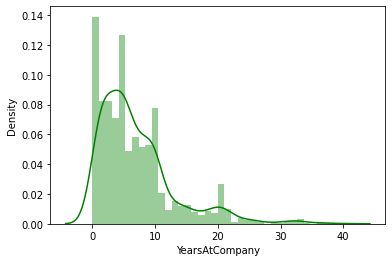

<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


Description ofYearsInCurrentRole
count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64 Description ofYearsInCurrentRole


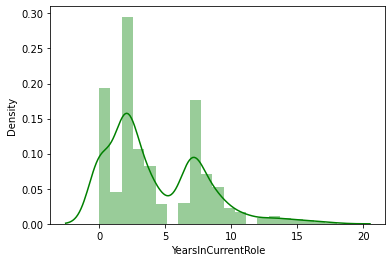

Description ofYearsSinceLastPromotion


<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64 Description ofYearsSinceLastPromotion


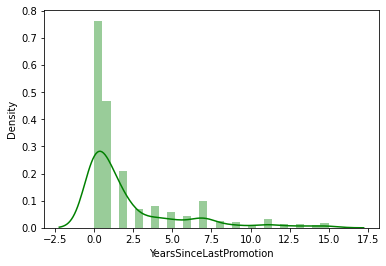

<ipython-input-44-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


Description ofYearsWithCurrManager
count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64 Description ofYearsWithCurrManager


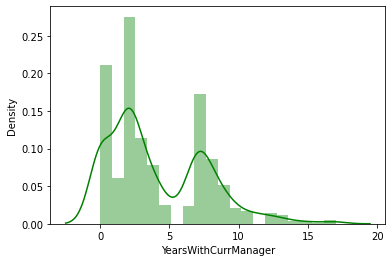

In [46]:
for x in lstnumericcolumns:
    univariateAnalysis(x)

In [47]:
Default1['Attrition']=pd.Categorical(Default1['Attrition']).codes
Default1['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

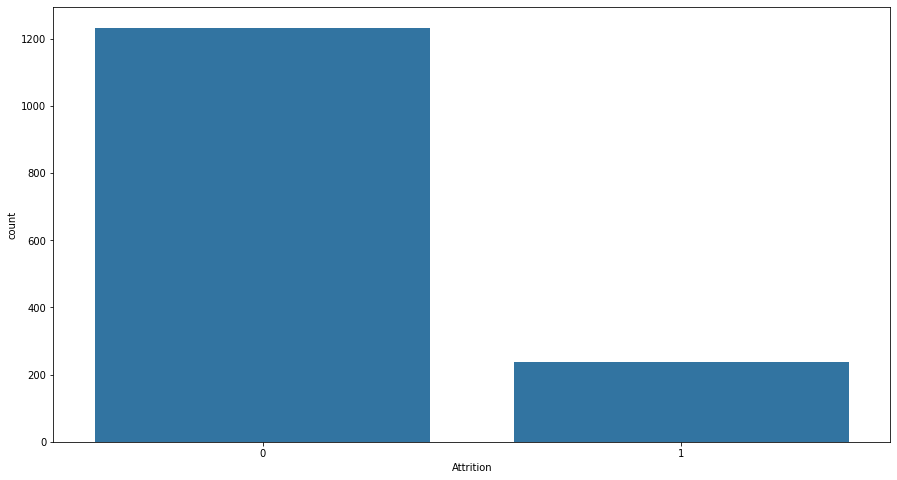

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(data=Default1,x="Attrition")

In [49]:
Default1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int8  
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

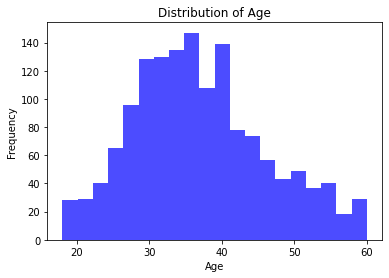

In [50]:
plt.hist(Default1['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

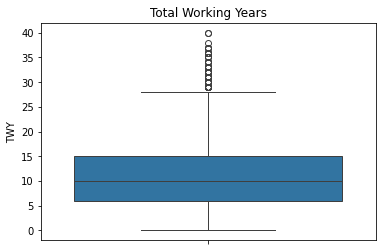

In [51]:
sns.boxplot(y=Default1['TotalWorkingYears'])
plt.title('Total Working Years')
plt.ylabel('TWY')
plt.show()

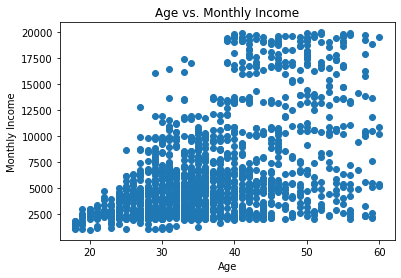

In [52]:
plt.scatter(Default1['Age'], Default1['MonthlyIncome'])
plt.title('Age vs. Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()


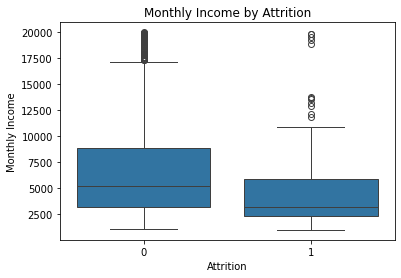

In [53]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=Default1)
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


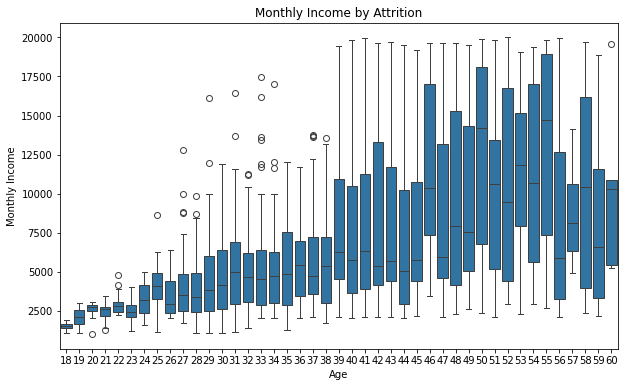

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Age', y='MonthlyIncome', data=Default1)
plt.title('Monthly Income by Attrition')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

In [55]:
Default1['Department']=pd.Categorical(Default1['Department']).codes
Default1['Department'].value_counts()

Department
1    961
2    446
0     63
Name: count, dtype: int64

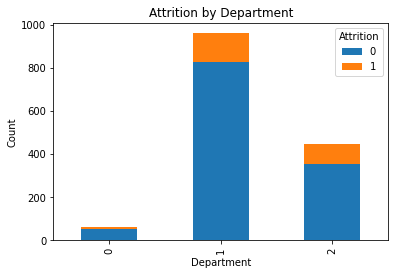

In [56]:
pd.crosstab(Default1['Department'], Default1['Attrition']).plot(kind='bar', stacked=True)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


This graph indicates which departments are experiencing higher attrition rates. The first department experiences a higher attrition rate compared to the second department.

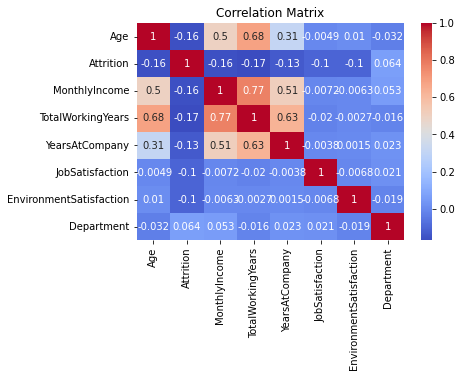

In [57]:
correlation_matrix = Default1[['Age',"Attrition",'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'JobSatisfaction', 'EnvironmentSatisfaction',"Department"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Monthly Income is strongly correlated with Total Working Years and Years at Company, which shows that higher income with more experience.
Attrition shows a slight negative correlation with Total Working Years and Age, which indicates lower attrition rates among more experienced and older employees.
Job Satisfaction and Environment Satisfaction have minimal correlation with attrition, indicates other factors might be more influential in determining attrition.

In [58]:
import pandas as pd
Default1 = pd.get_dummies(Default1, columns=['JobRole', 'MaritalStatus'], drop_first=True)


In [59]:

Default1 = pd.get_dummies(Default1, columns=['Department'], drop_first=True)

In [60]:
Default1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             1470 non-null   int64 
 1   Attrition                       1470 non-null   int8  
 2   BusinessTravel                  1470 non-null   object
 3   DailyRate                       1470 non-null   int64 
 4   DistanceFromHome                1470 non-null   int64 
 5   Education                       1470 non-null   int64 
 6   EducationField                  1470 non-null   object
 7   EmployeeCount                   1470 non-null   int64 
 8   EmployeeNumber                  1470 non-null   int64 
 9   EnvironmentSatisfaction         1470 non-null   int64 
 10  Gender                          1470 non-null   object
 11  HourlyRate                      1470 non-null   int64 
 12  JobInvolvement                  1470 non-null   

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

In [62]:

X = Default1.drop('Attrition', axis=1)
y = Default1['Attrition'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_col = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_col = X_train.select_dtypes(include=['int64', 'float64',"int8"]).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_col),
        ('cat', OneHotEncoder(drop='first'), categorical_col)
    ]
)

In [63]:

linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])


linear_pipeline.fit(X_train, y_train)

y_pred = linear_pipeline.predict(X_test)
y_prob =linear_pipeline.predict_proba(X_test)[:, 1]


Confusion Matrix (Logistic Regression):
 [[246   9]
 [ 21  18]]


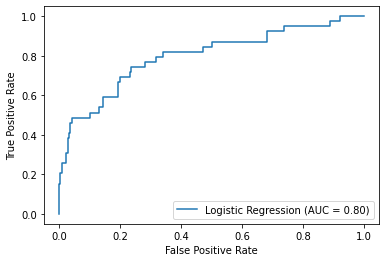

In [64]:
# Confusion Matrix
cm_lr1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Logistic Regression):\n", cm_lr1)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()

Here, Confusion Matrix shows 246 true negatives and 18 true positives, with 9 false positives and 21 false negatives, which means the model is better at predicting negatives non-attrition than positives.
The AUC is 0.80, indicating a good prediction. The curve stays relatively high over the false positive rate axis, reflecting a favorable balance between sensitivity and specificity.

In [65]:
from sklearn.metrics import classification_report

In [66]:
report_lreg = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Classification Report (Logistic Regression):\n", report_lreg)

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.67      0.46      0.55        39

    accuracy                           0.90       294
   macro avg       0.79      0.71      0.74       294
weighted avg       0.89      0.90      0.89       294



Class. 0 Inference:
Precision is high at 0.92, which means when the model predicts 'No Attrition', it is correct 92% of the time.
Recall is high at 0.96, which means the model successfully captures 96% of all actual 'No Attrition' cases.
F1-score is 0.94, shows a strong balance between precision and recall.
Class. 1 Inference:
Precision is lower at 0.67- The model's predictions of 'Attrition' are correct 67% of the time.
Recall is very lower at 0.46- The model only identifies 46% of all true 'Attrition' cases.
F1-score is 0.55, this is moderately low, reflecting the poorer precision and recall.

In [67]:
# Random Forest
randomf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
randomf_pipeline.fit(X_train, y_train)

# Predictions
y_pred_rf1 = randomf_pipeline.predict(X_test)
y_prob_rf1 = randomf_pipeline.predict_proba(X_test)[:, 1]


Confusion Matrix (Random Forest):
 [[254   1]
 [ 36   3]]


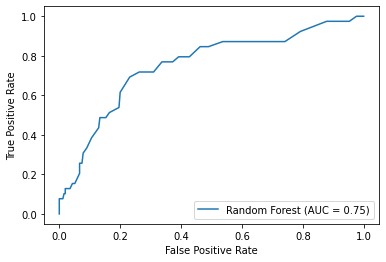

In [68]:


# Confusion Matrix
cm_rf1 = confusion_matrix(y_test, y_pred_rf1)
print("Confusion Matrix (Random Forest):\n", cm_rf1)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf, estimator_name='Random Forest').plot()


In [71]:

report_rfor = classification_report(y_test, y_pred_rf1, target_names=['No', 'Yes'])
print("Classification Report (Random Forest):\n", report_rfor)


Classification Report (Random Forest):
               precision    recall  f1-score   support

          No       0.88      1.00      0.93       255
         Yes       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



The Random Forest model has high precision of 0.88 and perfect recall 1.00 for predicting non-attrition which is 'No', but struggles significantly with attrition-'Yes', achieved only 0.75 precision and very low recall i.e.0.08. This results in a poor F1-score 0.14 for attrition, indicating the model is not effective at identifying actual attrition cases despite a overall accuracy 0.87. The ROC curve confirms moderate score of 0.75.

In [70]:
# Set up the grid search
param_grid_rfor = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__max_depth': [4, 6, 8],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search_rfor = GridSearchCV(randomf_pipeline, param_grid=param_grid_rfor, cv=3, scoring='accuracy', verbose=2)
grid_search_rfor.fit(X_train, y_train)
print("Best score:", grid_search_rfor.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END classifier__max_depth=4, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=4, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=4, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=4, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=4, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__max_depth=4, classifie

In [72]:
best_preds = grid_search_rfor.predict(X_test)
best_report_rfor = classification_report(y_test, best_preds, target_names=['No', 'Yes'])
print("Classification Report (Best Random Forest Model):\n", best_report_rfor)

Classification Report (Best Random Forest Model):
               precision    recall  f1-score   support

          No       0.88      1.00      0.93       255
         Yes       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294




The best Random Forest model after hyperparameter tuning shows a slight improvement in predicting attrition, 'Yes', with precision increasing to 0.80 and recall to 0.10. The F1-score for attrition improves moderate to 0.18. Overall accuracy is high at 0.88, indicating good performance on non-attrition but still limited effectiveness in correctly identifying attrition cases.

Final Inference:
    Logistic Regression and Random Forest, both has performed well in identifying employees who will not leave where we observed the high precision and recall for 'No Attrition', but struggle significantly to accurately predict actual cases of attrition i.e. yes. This reflects a common issue with class imbalance, where the models excel in predicting the majority class but fail to effectively capture the minority class.